In [19]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib
from pylab import *
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bootcampviztools import *
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor

In [4]:
df = pd.read_csv('train.csv')
##df_test = pd.read_csv('test.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


In [6]:

df['GPU_Brand'] = df['Gpu'].str.split().str[0]
df['CPU_Brand'] = df['Cpu'].str.split().str[0]

In [7]:
df_mod = pd.get_dummies(df, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)
X = df_mod.drop(columns=['Price_euros'])
y = df_mod['Price_euros']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train['Weight'] = X_train['Weight'].str.replace('kg', '').astype(float)
X_train['Ram'] = X_train['Ram'].str.replace('GB', '').astype(float)
X_test['Weight'] = X_test['Weight'].str.replace('kg', '').astype(float)
X_test['Ram'] = X_test['Ram'].str.replace('GB', '').astype(float)

In [10]:
""" X_train.Gpu """

' X_train.Gpu '

In [11]:
""" X_train['GPU_Brand'] = X_train['Gpu'].str.split().str[0]
X_train['CPU_Brand'] = X_train['Cpu'].str.split().str[0]
X_test['GPU_Brand'] = X_test['Gpu'].str.split().str[0]
X_test['CPU_Brand'] = X_test['Cpu'].str.split().str[0] """

" X_train['GPU_Brand'] = X_train['Gpu'].str.split().str[0]\nX_train['CPU_Brand'] = X_train['Cpu'].str.split().str[0]\nX_test['GPU_Brand'] = X_test['Gpu'].str.split().str[0]\nX_test['CPU_Brand'] = X_test['Cpu'].str.split().str[0] "

In [12]:
""" X_train_mod = pd.get_dummies(X_train, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)
X_test_mod = pd.get_dummies(X_test, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int) """

" X_train_mod = pd.get_dummies(X_train, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)\nX_test_mod = pd.get_dummies(X_test, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int) "

In [13]:
X_train_mod=X_train
X_test_mod=X_test

In [14]:
X_train_mod = X_train_mod.drop(columns=['Product'])
X_test_mod = X_test_mod.drop(columns=['Product'])

In [15]:
X_train_mod.info()

<class 'pandas.core.frame.DataFrame'>
Index: 729 entries, 25 to 102
Columns: 310 entries, id to Company_Xiaomi
dtypes: float64(3), int32(305), int64(2)
memory usage: 902.7 KB


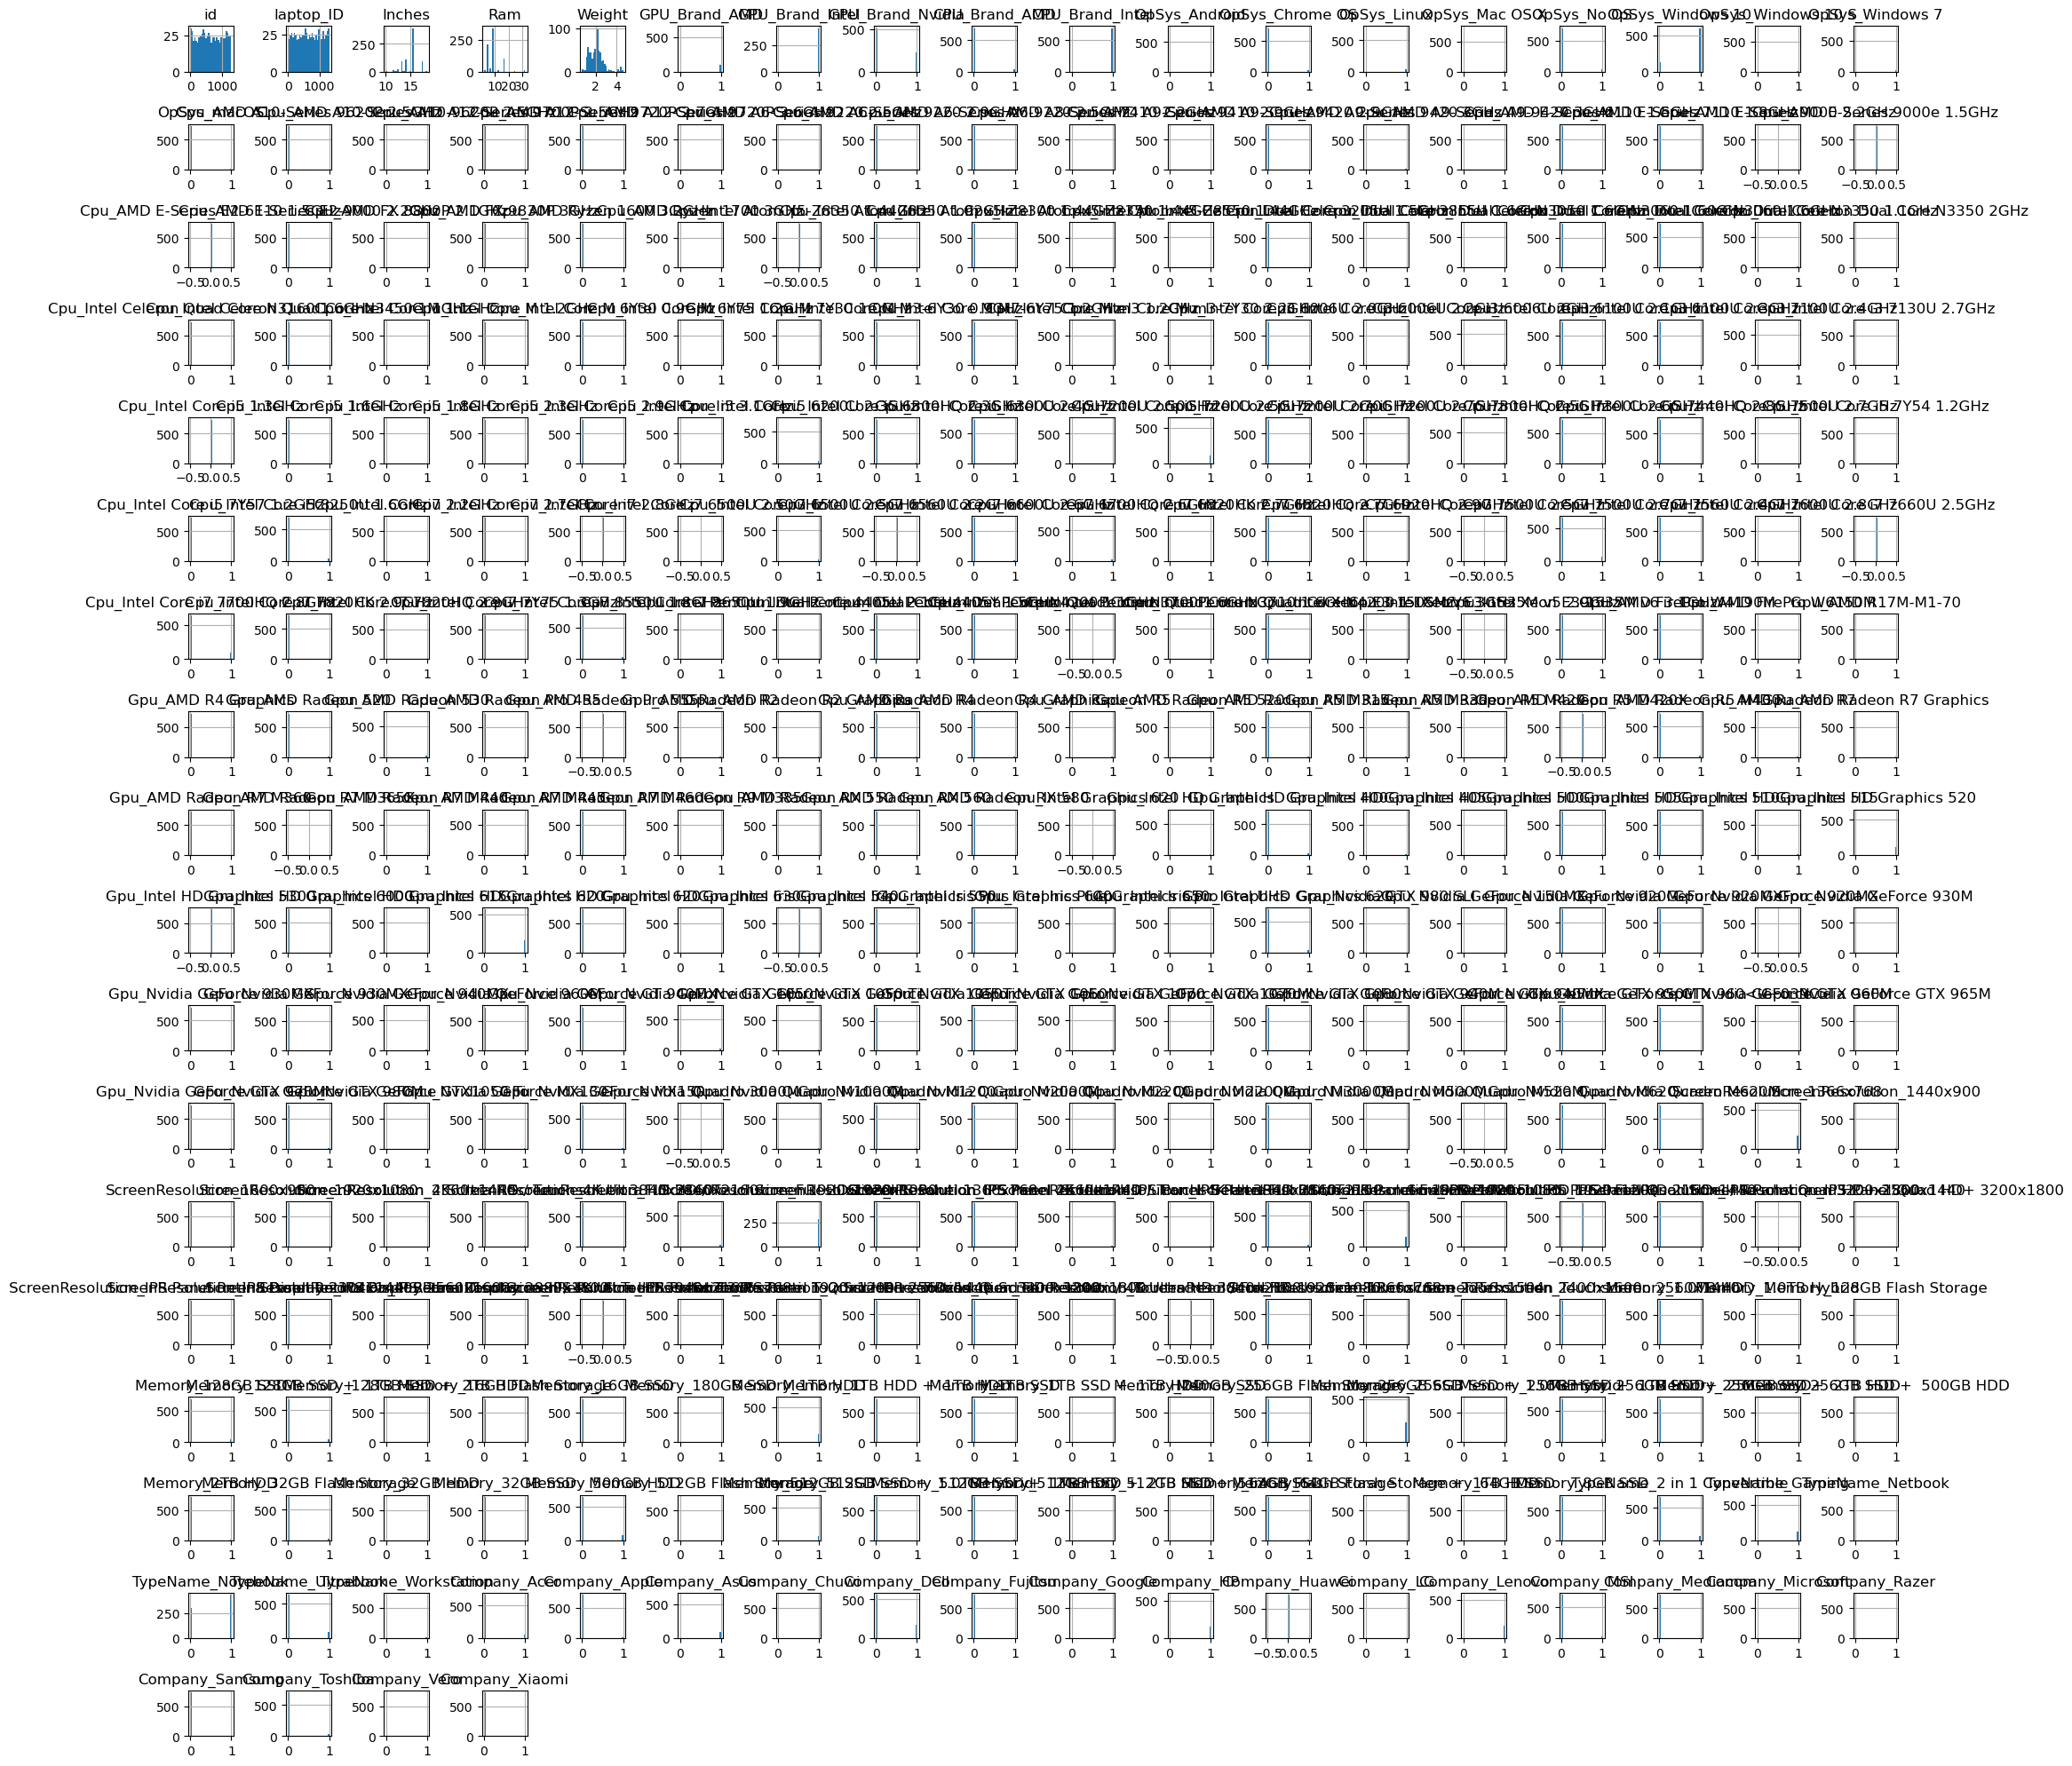

In [18]:
X_train_mod.hist(figsize=(20, 20), bins=30)
plt.tight_layout()
plt.show()

In [ ]:
target = 'Price_euros'

In [ ]:
""" categoricas = [feature for feature in df_modificado.columns if df_modificado[feature].dtype == 'object']
numericas = ['Inches', 'Weight'] """

" categoricas = [feature for feature in df_modificado.columns if df_modificado[feature].dtype == 'object']\nnumericas = ['Inches', 'Weight'] "

In [ ]:
""" categoricas """

' categoricas '

In [ ]:
""" for categoria in categoricas:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=categoria, data=df_modificado, order=df[categoria].value_counts().index)
    plt.title(f'Distribución de la categoría {categoria}')
    plt.xlabel('Frecuencia')
    plt.ylabel(categoria)
    plt.show() """

" for categoria in categoricas:\n    plt.figure(figsize=(10, 6))\n    sns.countplot(y=categoria, data=df_modificado, order=df[categoria].value_counts().index)\n    plt.title(f'Distribución de la categoría {categoria}')\n    plt.xlabel('Frecuencia')\n    plt.ylabel(categoria)\n    plt.show() "

In [ ]:
""" df_modificado.Weight """

' df_modificado.Weight '

In [ ]:
""" df_modificado.info() """

' df_modificado.info() '

In [ ]:
y_train
X_train_mod['Price_euros'] = y_train

Index(['id', 'laptop_ID', 'Inches', 'Ram', 'Weight', 'GPU_Brand_AMD',
       'GPU_Brand_Intel', 'GPU_Brand_Nvidia', 'CPU_Brand_AMD',
       'CPU_Brand_Intel',
       ...
       'Company_Lenovo', 'Company_MSI', 'Company_Mediacom',
       'Company_Microsoft', 'Company_Razer', 'Company_Samsung',
       'Company_Toshiba', 'Company_Vero', 'Company_Xiaomi', 'Price_euros'],
      dtype='object', length=311)
                       id  laptop_ID    Inches       Ram    Weight  \
id               1.000000   0.009738  0.038052 -0.021972  0.053836   
laptop_ID        0.009738   1.000000 -0.119979 -0.078897 -0.029661   
Inches           0.038052  -0.119979  1.000000  0.265210  0.826690   
Ram             -0.021972  -0.078897  0.265210  1.000000  0.447989   
Weight           0.053836  -0.029661  0.826690  0.447989  1.000000   
...                   ...        ...       ...       ...       ...   
Company_Samsung -0.009891   0.014495 -0.107374  0.032999 -0.124825   
Company_Toshiba -0.010795   0.044145

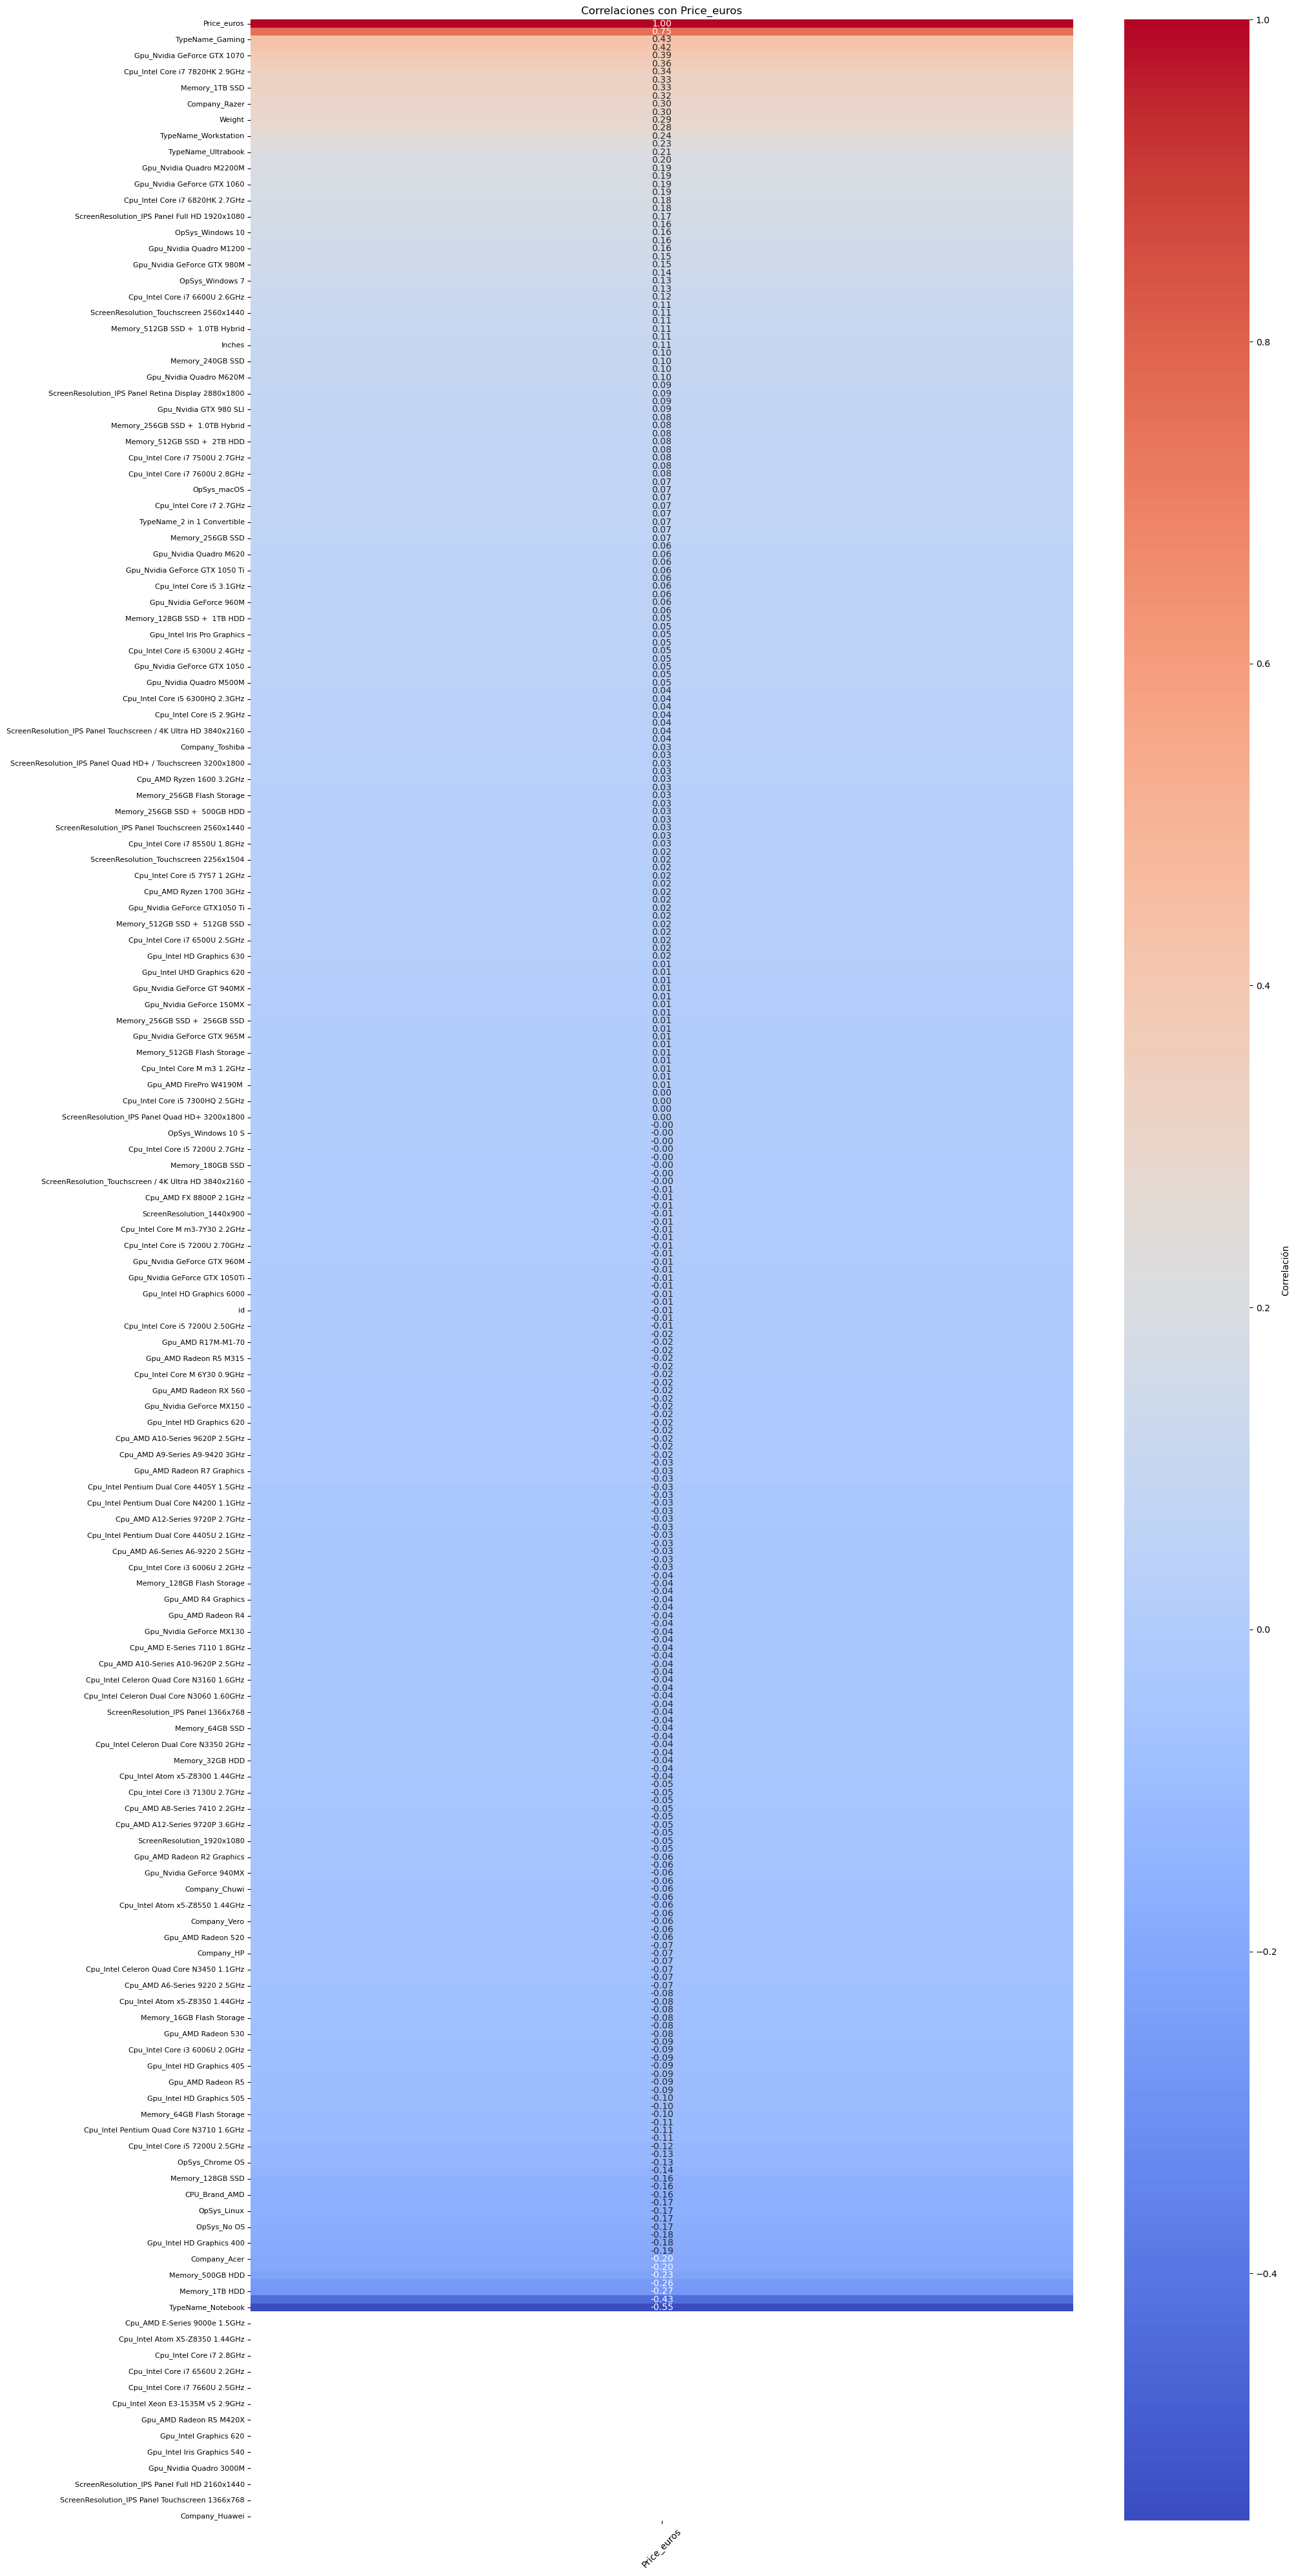

In [ ]:
# Filtrar solo las columnas numéricas
numerical_df = X_train_mod.select_dtypes(include=['int64', 'int32', 'float64'])

# Verificar las columnas seleccionadas
print(numerical_df.columns)

# Calcular la matriz de correlación
correlation_matrix = numerical_df.corr()

# Mostrar la matriz de correlación completa
print(correlation_matrix)

# Extraer las correlaciones con 'Price_euros'
price_correlations = correlation_matrix['Price_euros'].sort_values(ascending=False)
print(price_correlations)

significant_correlations = price_correlations[price_correlations > 0].index.tolist()

# Crear una visualización de la matriz de correlación enfocada en 'Price_euros'
plt.figure(figsize=(20, 40))  # Ajusta el tamaño de la figura
sns.heatmap(correlation_matrix[['Price_euros']].sort_values(by='Price_euros', ascending=False), annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlación'})
plt.title('Correlaciones con Price_euros')
plt.xticks(rotation=45)
plt.yticks(rotation=0, size=8)  # Ajusta el tamaño de las etiquetas
plt.tight_layout()
plt.show()

In [ ]:
significant_correlations

['Price_euros',
 'Ram',
 'TypeName_Gaming',
 'GPU_Brand_Nvidia',
 'Gpu_Nvidia GeForce GTX 1070',
 'Cpu_Intel Core i7 7700HQ 2.8GHz',
 'Cpu_Intel Core i7 7820HK 2.9GHz',
 'Gpu_Nvidia GeForce GTX 1080',
 'Memory_1TB SSD',
 'ScreenResolution_4K Ultra HD / Touchscreen 3840x2160',
 'Company_Razer',
 'Memory_512GB SSD',
 'Weight',
 'Memory_256GB SSD +  1TB HDD',
 'TypeName_Workstation',
 'ScreenResolution_IPS Panel 4K Ultra HD 3840x2160',
 'TypeName_Ultrabook',
 'Memory_512GB SSD +  1TB HDD',
 'Gpu_Nvidia Quadro M2200M',
 'Cpu_Intel Xeon E3-1535M v6 3.1GHz',
 'Gpu_Nvidia GeForce GTX 1060',
 'Company_MSI',
 'Cpu_Intel Core i7 6820HK 2.7GHz',
 'Memory_1TB SSD +  1TB HDD',
 'ScreenResolution_IPS Panel Full HD 1920x1080',
 'CPU_Brand_Intel',
 'OpSys_Windows 10',
 'Cpu_Intel Core i7 6700HQ 2.6GHz',
 'Gpu_Nvidia Quadro M1200',
 'ScreenResolution_4K Ultra HD 3840x2160',
 'Gpu_Nvidia GeForce GTX 980M',
 'Gpu_Nvidia Quadro M3000M',
 'OpSys_Windows 7',
 'Gpu_Nvidia GeForce GTX 1070M',
 'Cpu_Intel Core

In [ ]:
significant_correlations.remove('Price_euros')

In [ ]:
X_train_mod

,id,laptop_ID,Inches,Ram,Weight,GPU_Brand_AMD,GPU_Brand_Intel,GPU_Brand_Nvidia,CPU_Brand_AMD,CPU_Brand_Intel,...,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi,Price_euros
25,829,41,15.6,4.0,2.00,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,389.0
84,788,127,15.6,4.0,2.10,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,451.0
10,851,1243,15.6,4.0,2.65,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,309.0
342,126,105,15.6,8.0,2.20,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,647.0
890,223,578,14.0,8.0,1.94,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,389.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,555,267,15.6,4.0,2.10,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,722.0
270,308,610,17.3,16.0,4.14,0,0,1,0,1,...,0,1,0,0,0,0,0,0,0,2199.0
860,281,1026,14.0,4.0,1.48,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1590.0
435,729,363,15.6,8.0,2.65,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,999.0


In [ ]:
X_test_mod

,id,laptop_ID,Inches,Ram,Weight,GPU_Brand_AMD,GPU_Brand_Intel,GPU_Brand_Nvidia,CPU_Brand_AMD,CPU_Brand_Intel,...,Company_LG,Company_Lenovo,Company_MSI,Company_Mediacom,Company_Microsoft,Company_Razer,Company_Samsung,Company_Toshiba,Company_Vero,Company_Xiaomi
649,174,722,15.6,16.0,1.93,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
761,691,1022,14.0,8.0,1.64,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
545,176,630,15.6,8.0,2.20,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
367,972,714,13.3,8.0,1.60,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
361,554,624,15.6,8.0,1.84,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344,1230,312,15.6,8.0,2.20,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
581,232,671,15.6,6.0,2.04,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
872,116,955,17.3,4.0,2.80,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
449,626,672,17.3,8.0,2.70,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
features =['Inches', 'CPU_Brand_Intel', 'Weight', 'GPU_Brand_Nvidia']

X_train_mod_final = X_train_mod[significant_correlations] 
X_test_mod_final = X_test_mod[significant_correlations] 

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_mod_final, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
predicciones = model.predict(X_test_mod_final)

In [ ]:
print('MAE: ', metrics.mean_absolute_error(y_test,predicciones))
print('MSE: ', metrics.mean_squared_error(y_test,predicciones))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,predicciones)))
print('R2: ', model.score(X_test_mod_final,y_test))

MAE:  215.97504426229506
MSE:  125902.55504761612
RMSE:  354.8275004105743
R2:  0.7084955402344439


In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

In [ ]:
grid_search.fit(X_train_mod_final, y_train)

Fitting 5 folds for each of 1650 candidates, totalling 8250 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10, 15, 20],
                         'n_estimators': [50, 100, 200, 300, 400, 500]},
             verbose=2)

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros: ", best_params)

Mejores hiperparámetros:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
y_pred_train = best_model.predict(X_train_mod_final)
y_pred_test = best_model.predict(X_test_mod_final)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"MSE en entrenamiento: {mse_train}")
print(f"MSE en prueba: {mse_test}")
print('MAE: ', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE: ', metrics.mean_absolute_error(y_test, y_pred_test))

MSE en entrenamiento: 13934.252872930721
MSE en prueba: 124289.75958763032
MAE:  74.42680939643344
MAE:  215.2924336065573


In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib
from pylab import *
import seaborn as sns
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from bootcampviztools import *

# Cargar datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Información del DataFrame
df_train.info()

# Extraer marcas de GPU y CPU
df_train['GPU_Brand'] = df_train['Gpu'].str.split().str[0]
df_train['CPU_Brand'] = df_train['Cpu'].str.split().str[0]
df_test['GPU_Brand'] = df_test['Gpu'].str.split().str[0]
df_test['CPU_Brand'] = df_test['Cpu'].str.split().str[0]

# Obtener variables dummy
df_train_mod = pd.get_dummies(df_train, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)
df_test_mod = pd.get_dummies(df_test, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)

X_train = df_train_mod.drop(columns=['Price_euros'])
y_train = df_train_mod['Price_euros']
X_test = df_test_mod.drop(columns=['Price_euros'])
y_test = df_test_mod['Price_euros']

# Convertir 'Weight' y 'Ram' a numérico
X_train['Weight'] = X_train['Weight'].str.replace('kg', '').astype(float)
X_train['Ram'] = X_train['Ram'].str.replace('GB', '').astype(float)
X_test['Weight'] = X_test['Weight'].str.replace('kg', '').astype(float)
X_test['Ram'] = X_test['Ram'].str.replace('GB', '').astype(float)

# Filtrar solo las columnas numéricas y calcular la matriz de correlación
X_train['Price_euros'] = y_train
numerical_df = X_train.select_dtypes(include=['int64', 'int32', 'float64'])
correlation_matrix = numerical_df.corr()
price_correlations = correlation_matrix['Price_euros'].sort_values(ascending=False)
significant_correlations = price_correlations[price_correlations > 0].index.tolist()
significant_correlations.remove('Price_euros')

# Preparar los conjuntos de datos finales para el entrenamiento y la prueba
X_train_mod_final = X_train[significant_correlations]
X_test_mod_final = X_test[significant_correlations]

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_mod_final, y_train)

# Hacer predicciones
predicciones = model.predict(X_test_mod_final)

# Evaluar el modelo
print('MAE: ', metrics.mean_absolute_error(y_test, predicciones))
print('MSE: ', metrics.mean_squared_error(y_test, predicciones))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, predicciones)))
print('R2: ', model.score(X_test_mod_final, y_test))

# Búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_mod_final, y_train)

# Mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros: ", best_params)

# Predicciones con el mejor modelo
y_pred_train = best_model.predict(X_train_mod_final)
y_pred_test = best_model.predict(X_test_mod_final)

# Evaluación del mejor modelo
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print(f"MSE en entrenamiento: {mse_train}")
print(f"MSE en prueba: {mse_test}")
print('MAE en entrenamiento: ', metrics.mean_absolute_error(y_train, y_pred_train))
print('MAE en prueba: ', metrics.mean_absolute_error(y_test, y_pred_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


KeyError: "['Price_euros'] not found in axis"

In [ ]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Cargar datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Información del DataFrame
df_train.info()

# Extraer marcas de GPU y CPU
df_train['GPU_Brand'] = df_train['Gpu'].str.split().str[0]
df_train['CPU_Brand'] = df_train['Cpu'].str.split().str[0]
df_test['GPU_Brand'] = df_test['Gpu'].str.split().str[0]
df_test['CPU_Brand'] = df_test['Cpu'].str.split().str[0]

# Obtener variables dummy
df_train_mod = pd.get_dummies(df_train, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)
df_test_mod = pd.get_dummies(df_test, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)

# Asegurarse de que las columnas de df_test_mod coincidan con las de df_train_mod
missing_cols = set(df_train_mod.columns) - set(df_test_mod.columns)
for col in missing_cols:
    df_test_mod[col] = 0
df_test_mod = df_test_mod[df_train_mod.columns.drop('Price_euros')]

X_train = df_train_mod.drop(columns=['Price_euros'])
y_train = df_train_mod['Price_euros']
X_test = df_test_mod

# Convertir 'Weight' y 'Ram' a numérico
X_train['Weight'] = X_train['Weight'].str.replace('kg', '').astype(float)
X_train['Ram'] = X_train['Ram'].str.replace('GB', '').astype(float)
X_test['Weight'] = X_test['Weight'].str.replace('kg', '').astype(float)
X_test['Ram'] = X_test['Ram'].str.replace('GB', '').astype(float)

# Filtrar solo las columnas numéricas y calcular la matriz de correlación
X_train['Price_euros'] = y_train
numerical_df = X_train.select_dtypes(include=['int64', 'int32', 'float64'])
correlation_matrix = numerical_df.corr()
price_correlations = correlation_matrix['Price_euros'].sort_values(ascending=False)
significant_correlations = price_correlations[price_correlations > 0].index.tolist()
significant_correlations.remove('Price_euros')

# Preparar los conjuntos de datos finales para el entrenamiento y la prueba
X_train_mod_final = X_train[significant_correlations]
X_test_mod_final = X_test[significant_correlations]

# Entrenar el modelo
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_mod_final, y_train)

# Hacer predicciones
predicciones = model.predict(X_test_mod_final)

# Guardar las predicciones en un archivo CSV
submission = pd.DataFrame({
    'id': df_test['id'],
    'precio_predecido': predicciones
})
submission.to_csv('submission.csv', index=False)

print('Predicciones guardadas en submission.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB


C:\Users\unais\AppData\Local\Temp\ipykernel_5840\2464390702.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_mod[col] = 0
C:\Users\unais\AppData\Local\Temp\ipykernel_5840\2464390702.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_mod[col] = 0
C:\Users\unais\AppData\Local\Temp\ipykernel_5840\2464390702.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat

Predicciones guardadas en submission.csv


In [17]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Cargar datos
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Información del DataFrame
df_train.info()

# Extraer marcas de GPU y CPU
df_train['GPU_Brand'] = df_train['Gpu'].str.split().str[0]
df_train['CPU_Brand'] = df_train['Cpu'].str.split().str[0]
df_test['GPU_Brand'] = df_test['Gpu'].str.split().str[0]
df_test['CPU_Brand'] = df_test['Cpu'].str.split().str[0]

# Obtener variables dummy
df_train_mod = pd.get_dummies(df_train, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)
df_test_mod = pd.get_dummies(df_test, columns=['GPU_Brand', 'CPU_Brand', 'OpSys', 'Cpu', 'Gpu', 'ScreenResolution', 'Memory', 'TypeName', 'Company'], dtype=int)

# Asegurarse de que las columnas de df_test_mod coincidan con las de df_train_mod
missing_cols = set(df_train_mod.columns) - set(df_test_mod.columns)
for col in missing_cols:
    df_test_mod[col] = 0
df_test_mod = df_test_mod[df_train_mod.columns.drop('Price_euros')]

X_train = df_train_mod.drop(columns=['Price_euros'])
y_train = df_train_mod['Price_euros']
X_test = df_test_mod

# Convertir 'Weight' y 'Ram' a numérico
X_train['Weight'] = X_train['Weight'].str.replace('kg', '').astype(float)
X_train['Ram'] = X_train['Ram'].str.replace('GB', '').astype(float)
X_test['Weight'] = X_test['Weight'].str.replace('kg', '').astype(float)
X_test['Ram'] = X_test['Ram'].str.replace('GB', '').astype(float)

# Filtrar solo las columnas numéricas y calcular la matriz de correlación
X_train['Price_euros'] = y_train
numerical_df = X_train.select_dtypes(include=['int64', 'int32', 'float64'])
correlation_matrix = numerical_df.corr()
price_correlations = correlation_matrix['Price_euros'].sort_values(ascending=False)
significant_correlations = price_correlations[price_correlations > 0].index.tolist()
significant_correlations.remove('Price_euros')

# Preparar los conjuntos de datos finales para el entrenamiento y la prueba
X_train_mod_final = X_train[significant_correlations]
X_test_mod_final = X_test[significant_correlations]

# Definir el modelo y la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo
grid_search.fit(X_train_mod_final, y_train)

""" results = grid_search.cv_results_
mse_scores = -results['mean_test_neg_mean_squared_error']
mae_scores = -results['mean_test_neg_mean_absolute_error']

print("MSE para cada fold:")
print(mse_scores)
print("\nMAE para cada fold:")
print(mae_scores)
 """
# Mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Mejores hiperparámetros: ", best_params)

# Predicciones con el mejor modelo
y_pred_train = best_model.predict(X_train_mod_final)
y_pred_test = best_model.predict(X_test_mod_final)

# Evaluación del mejor modelo
mse_train = mean_squared_error(y_train, y_pred_train)
print(f"MSE en entrenamiento: {mse_train}")
print('MAE en entrenamiento: ', metrics.mean_absolute_error(y_train, y_pred_train))

# Guardar las predicciones en un archivo CSV
submission = pd.DataFrame({
    'id': df_test['id'],
    'precio_predecido': y_pred_test
})
submission.to_csv('submission.csv', index=False)

print('Predicciones guardadas en submission.csv')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912 entries, 0 to 911
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                912 non-null    int64  
 1   laptop_ID         912 non-null    int64  
 2   Company           912 non-null    object 
 3   Product           912 non-null    object 
 4   TypeName          912 non-null    object 
 5   Inches            912 non-null    float64
 6   ScreenResolution  912 non-null    object 
 7   Cpu               912 non-null    object 
 8   Ram               912 non-null    object 
 9   Memory            912 non-null    object 
 10  Gpu               912 non-null    object 
 11  OpSys             912 non-null    object 
 12  Weight            912 non-null    object 
 13  Price_euros       912 non-null    float64
dtypes: float64(2), int64(2), object(10)
memory usage: 99.9+ KB
Fitting 5 folds for each of 1650 candidates, totalling 8250 fits


C:\Users\unais\AppData\Local\Temp\ipykernel_2096\478102725.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_mod[col] = 0
C:\Users\unais\AppData\Local\Temp\ipykernel_2096\478102725.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_test_mod[col] = 0
C:\Users\unais\AppData\Local\Temp\ipykernel_2096\478102725.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

Mejores hiperparámetros:  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
MSE en entrenamiento: 14147.381918522426
MAE en entrenamiento:  71.85287814857539
Predicciones guardadas en submission.csv
